# Author: Emmanuel Rodriguez

https://emmanueljrodriguez.com/

Date: 18 May 2022

Location: West Texas

## Requirements:

Perform multiple linear regression on a California housing dataset, by considering multiple features in the machine learning regression model, and predict future value.

Ref: Deitel, P., & Deitel, H. M. (2019). Intro to Python for Computer Science and Data Science. Pearson Education (US). https://bookshelf.vitalsource.com/books/9780135404812, p. 625.

### Read data

In [1]:
from sklearn.datasets import fetch_california_housing # Returns a 'Bunch' object containing the data and other info

california = fetch_california_housing()

List attributes of an object by:

In [2]:
#california.__dict__ # if this doesn't display anything, try:
california.__dir__()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

### Dataset description

In [3]:
# Display the dataset's description using the DESCR attribute
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

**Note: Each sample also has its target - a corresponding median house value in hundreds of thousands, so 3.55 = $355,000.**

In [4]:
# Confirm the number of samples (rows) and features (columns)
california.data.shape

(20640, 8)

In [5]:
# Verify the number of target values - the median house values, matches the number of samples
california.target.shape

(20640,)

In [6]:
# Use the object's 'feature_name' attribute to show features
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Initial exploration of data with Pandas

In [7]:
import pandas as pd

# Set some options
pd.set_option('precision', 4)
pd.set_option('max_columns',9)
pd.set_option('display.width', None)

In [8]:
# Create DataFrame with data and features_names
california_df = pd.DataFrame(california.data, columns=california.feature_names)

# Add a column for the median house values stored in .target
california_df['MedHouseValue'] = pd.Series(california.target)

In [9]:
california_df.head() # Show first 5 samples

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [10]:
# Summary statistics for each column
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


The median income is expressed in tens of thousands; a mean median income of 3.87 = $38,700.

The median house value is expressed in hundreds of thousands; a mean median house value of 2.07 = $207,000.

### Visualization

Visualize features - explore how the median home value relates to each feature.

In [11]:
# Plot the target value against each feature

# Use the DataFrame method 'sample' to randomly select 10% of the samples
sample_df = california_df.sample(frac=0.1, random_state=17) # random_state seeds the random number generator;
# the random seed generator is chosen arbitrarily, but selecting the same number is important for reproducibility.
# By using the same seed value, the method sample selects the same random subset of the DataFrame's rows.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2) # Scale each diagram's fonts to two times the default
sns.set_style('whitegrid')

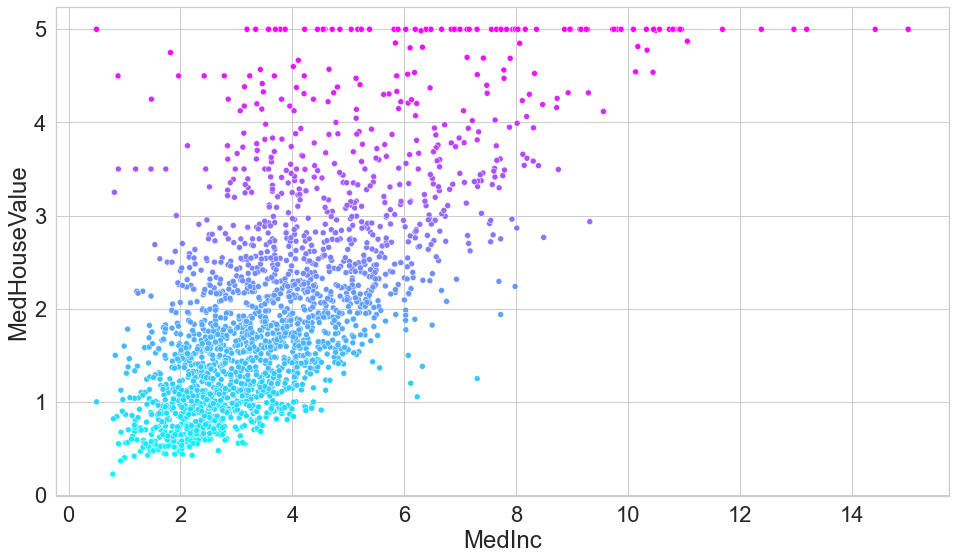

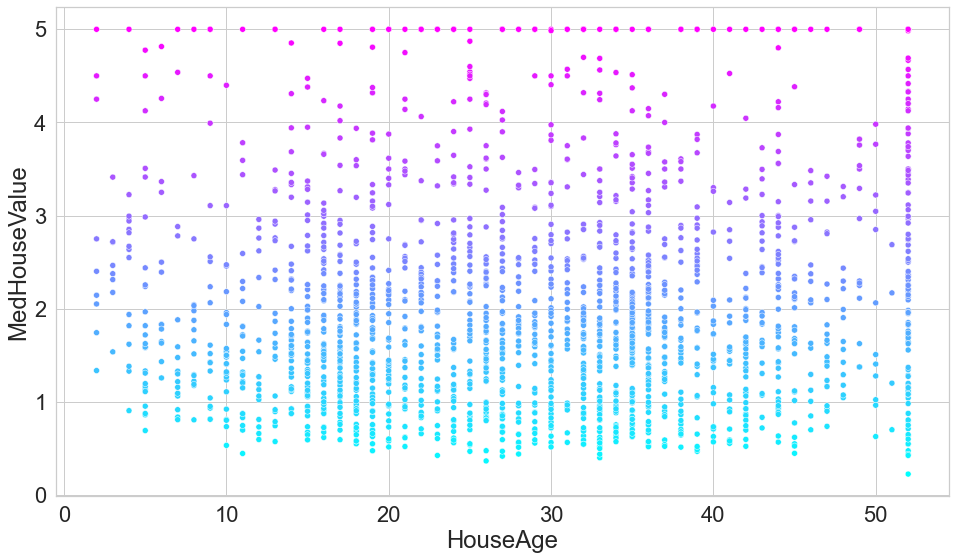

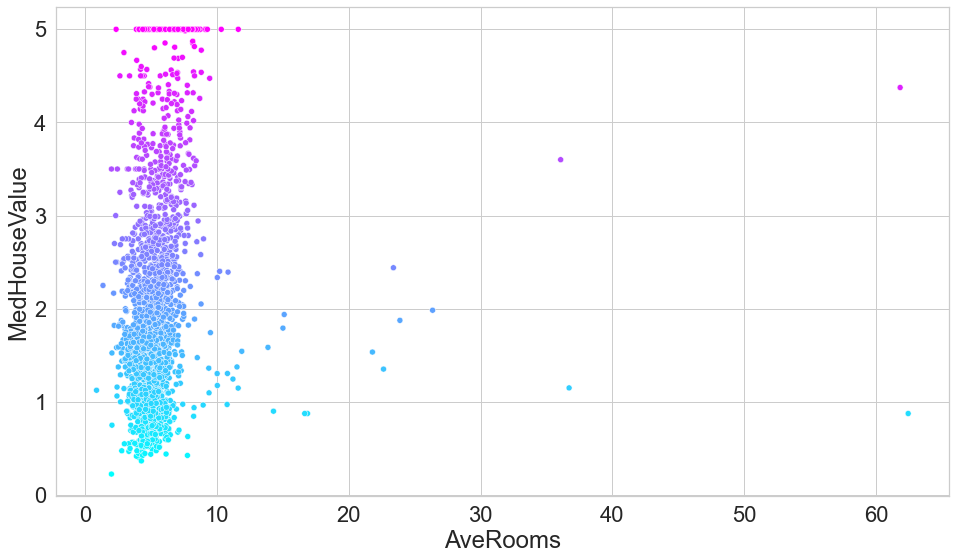

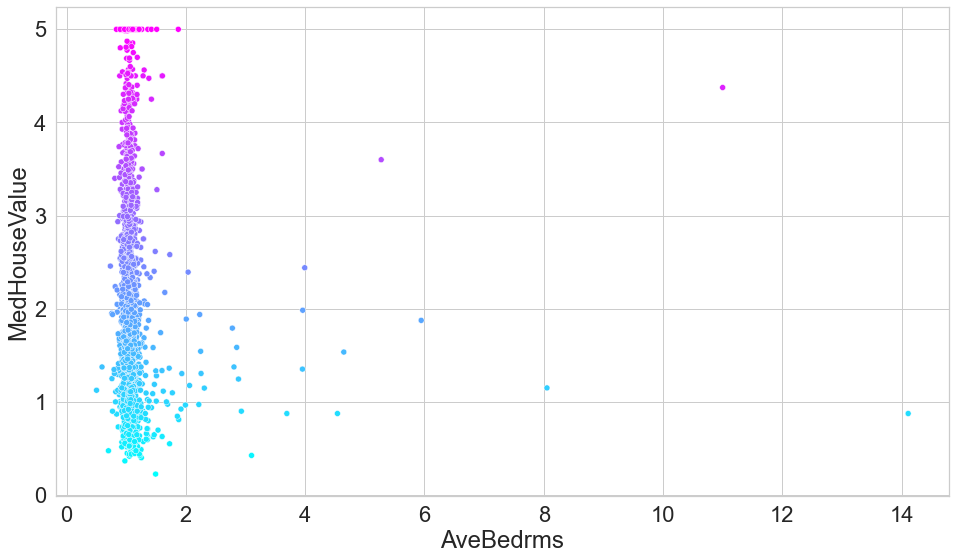

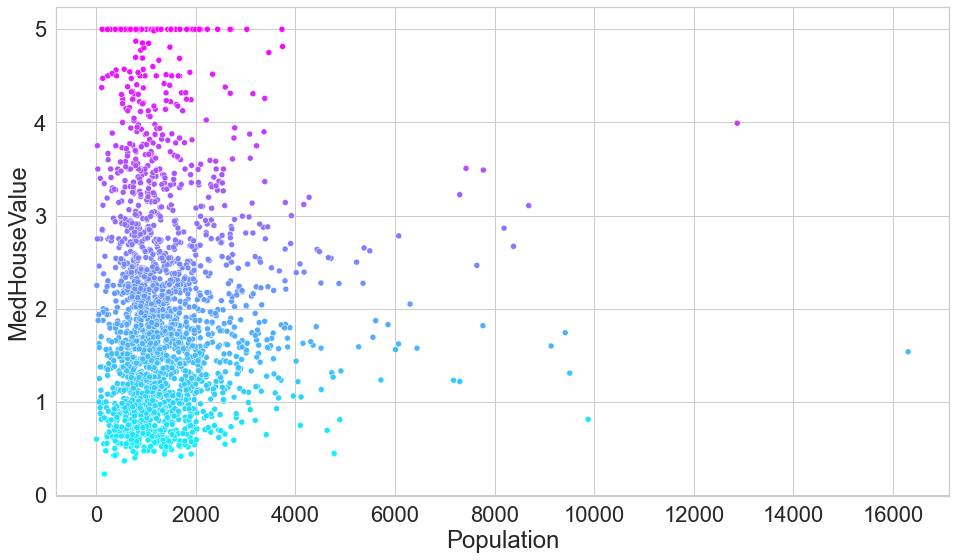

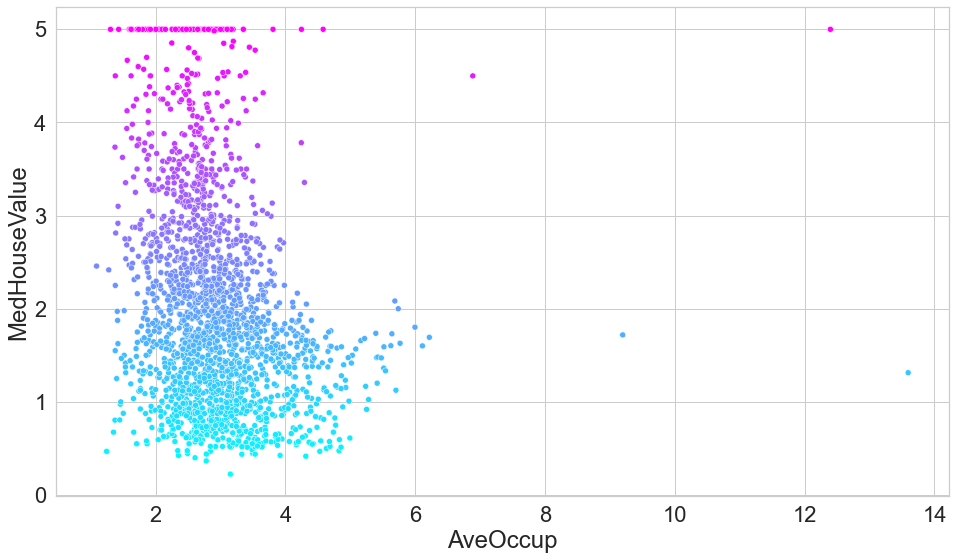

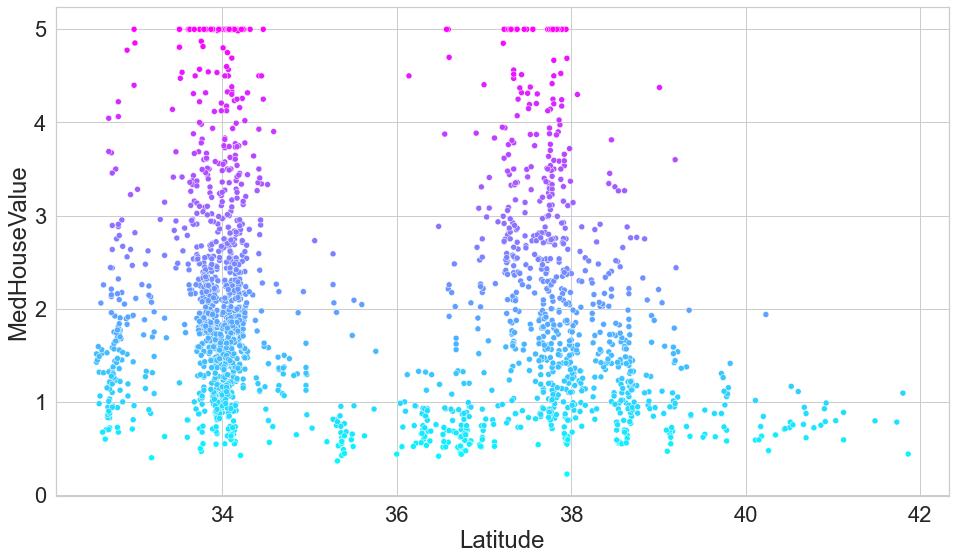

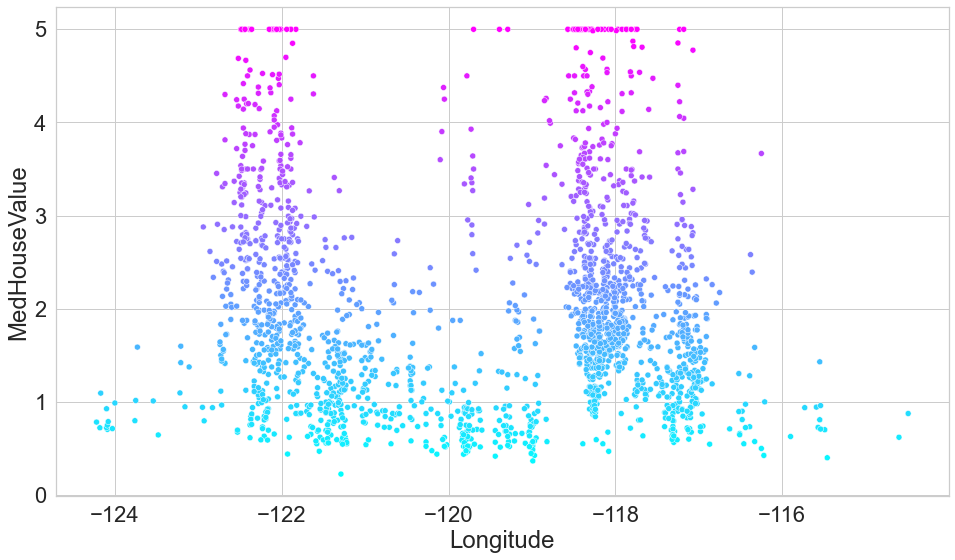

In [13]:
for feature in california.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=sample_df, x=feature,
                   y='MedHouseValue', hue='MedHouseValue',
                   palette='cool', legend=False)

Note: The highest home value that could be chosen on the 1990 census form was "500,000 or more," so any block group with a median house value over $500,000 is listed in the dataset at 5; hence the horizontal line of dots at y-axis value of 5.

In [14]:
# Multiple plots

#fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(2, 4)
#fig.suptitle('California Housing Median House Value by Feature')

#ax1.plot()

In [15]:
# Mutiple plots -- needs fixing, - ejr
#for feature in california.feature_names:
#    sns.relplot(data=sample_df,
#               x=feature, y='MedHouseValue',
#               palette='cool', legend=False)

### Split data for training and testing

In [16]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


### Train the model

In [17]:
from sklearn.linear_model import LinearRegression
# By default the 'LinearRegression' estimator uses all features in the data array to perform multiple linear-regression
# Data must be of continuous type, categorical data produces an error - it must be converted to continuous

linear_regression = LinearRegression()

# Invoke the 'fit' method to train the estimator
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [18]:
# View the coefficients for each feature, and the intercept
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.43770302153822066
  HouseAge: 0.009216834565797683
  AveRooms: -0.10732526637361023
 AveBedrms: 0.6117133073918092
Population: -5.756822009287096e-06
  AveOccup: -0.0033845664657161947
  Latitude: -0.4194818609649075
 Longitude: -0.43377133498740106


In [19]:
linear_regression.intercept_

-36.882950656055414

In [20]:
# Get regression summary
import statsmodels.api as sm # library with functions for estimation of stats models
from scipy import stats # stats library

X2 = sm.add_constant(X_train) # Adds a column of ones to the array of features
est = sm.OLS(y_train, X2) # ordinary least squares, to measure the spread in the data
est2 = est.fit() # fit model to data

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2995.
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        13:57:19   Log-Likelihood:                -16921.
No. Observations:               15480   AIC:                         3.386e+04
Df Residuals:                   15471   BIC:                         3.393e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.8830      0.765    -48.216      0.0

* For positive coefficients, the median house value **increases** as the feature value **increases**.
* For negative coefficients, the median house value **decreases** as the feature value **increases**.
* P-values: All are below the level of significance, 0.05, with the exception of x5 (population); this indicates that all features except population are having an effect on the median house value.
* Feature coefficient value can be used to rank the level of effect on the median house value, the higher the coefficient value the higher the effect. (Coefficient*2 = total effect on the target)

Regression model (to make prediction):

$y = \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + b + \epsilon$

* Where the $\beta$s are the feature coefficients,
* $b$ is the intercept,
* $x$s are the feature values
* $\epsilon$ is the standard error
* $y$ is the predicted value (the dependent variable)  

### Test the model

In [21]:
# Test the model by calling the estimator's 'predict' method
predicted = linear_regression.predict(X_test)
expected = y_test

In [22]:
# Inspect results, predicted vs expected
print(predicted[:5])
print(expected[:5])

[1.25396876 2.34693107 2.03794745 1.8701254  2.53608339]
[0.762 1.732 1.125 1.37  1.856]


### Visualize expected vs. predicted prices

In [23]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

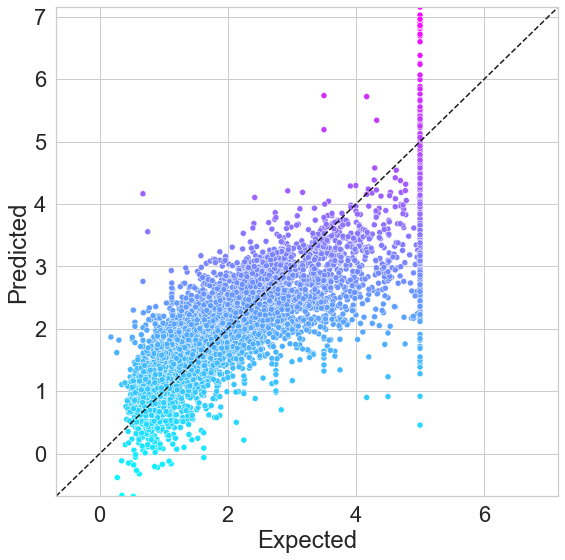

In [33]:
figure = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

# Set axes limits to use the same scale
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

# Plot line that represents perfect predictions (not a regression line)
line = plt.plot([start, end], [start, end], 'k--')

Observation: It appears that as the expected median house value increases, more predicted values fall below the line. Therefore, the model seems to predict lower median house values as the expected median house value increases.

### Model metrics

In [27]:
from sklearn import metrics

In [28]:
# metrics.__dir__() # List the module's functions
metrics.r2_score(expected, predicted) # r-squared, measures how well the models fits the data, 1.0 being a perfect fit.

0.6008983115964329

In [29]:
metrics.mean_squared_error(expected, predicted) # the average square of the difference between expected and predicted value
# Essentially, the average error in the spread of the data.

0.5350149774449122

List of scikit-learn's metrics functions by estimator category:

https://scikit-learn.org/stable/modules/model_evaluation.html

### Alternate estimators

Try other estimators to assess their accuracy compared to the *LinearRegression* estimator.
* Estimators that produce a model with a **standard error** close to 0 are best.
* Estimators that produce a model with a **R-square*** value close to 1.0 are best.

*Adjusted-R-square is a better metric, as it factors in the number of features.

In [30]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {'LinearRegression': linear_regression,
             'ElasticNet': ElasticNet(),
             'Lasso': Lasso(),
             'Ridge': Ridge()
             }

Estimators will be run using k-fold cross-validation with a *KFold* object and the cross_val_score function.
K-fold cross-validation enables you to use all of your data for both training and testing, to get a better sense of how well your model will make predictions for new data by repeatedly training and testing the model with different portions of the dataset.K-fold cross-validation splits the dataset into k equal-size folds (this k is unrelated to k in the k-nearest neighbors algorithm).
For further details see, Deitel. p. 616.

In [31]:
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold= KFold(n_splits=10, random_state=11, 
                 shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                           X=california.data, y=california.target,
                           cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


*LinearRegression* and *Ridge* are the best performing estimators for this dataset.

In [32]:
# Pop-out figure, use an interactive backend
#%matplotlib tk
#plt.plot([1, 2])